In [ ]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import keras.layers
import matplotlib.pyplot as plt
import sklearn
import scipy
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, LSTM, Embedding, Input, Flatten, Concatenate, Dropout, LSTM, Normalization, Conv1D, MaxPooling1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import Model 
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import ndimage, ndarray
import nltk
from nltk import SnowballStemmer
from nltk.tokenize import word_tokenize
import math
from nltk.corpus import stopwords
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
import string
import tensorflow
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
import math

#Ok soooo some of these imports were for the preprocessing: in a different folder. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# unzipping the numpy array of hashtags bag of words

In [ ]:
!unzip '/content/drive/MyDrive/My Fun Word Classifier for Hare/Hashtags_Np.npz'
#!unzip '/content/drive/MyDrive/My Fun Word Classifier for Hare/Hashtags_Np_Longer.npz' 

Archive:  /content/drive/MyDrive/My Fun Word Classifier for Hare/Hashtags_Np.npz
  inflating: arr_0.npy               


# reading in my data and labels into seperate np arrays

In [ ]:

text = np.load('/content/drive/MyDrive/My Fun Word Classifier for Hare/text_tokenized.npy')
hashtags = np.load('/content/arr_0.npy')


In [ ]:
labels = np.load('/content/drive/MyDrive/My Fun Word Classifier for Hare/targets.csv.npy')

Defining functions to split and shuffle my data

In [ ]:
def shuffle_unison(a, b, c):
    assert len(a) == len(b) == len(c)
    p = np.random.permutation(len(a))
    return a[p], b[p], c[p]


# shuffling the data

In [ ]:
text, hashtags, labels= shuffle_unison(text, hashtags, labels)

In [ ]:
print(text.shape)
print(hashtags.shape)
print(labels.shape)

(592803, 904)
(592803, 501)
(592803,)


In [ ]:
split = math.floor(len(text)*.85)

In [ ]:
split

503882

# Building the Model

In [ ]:
#building the model 

# building the input and embedder for the text input
textIn = Input(shape = (text.shape[1],))
textEmbedder = Embedding(input_dim = 2000, output_dim =  150, input_length = text.shape[1])(textIn)
textFlat = Flatten()(textEmbedder)

# building the input and embedder for the hashtags
hashIn = Input(shape = (hashtags.shape[1],))

# Concatenating the layers
combined = Concatenate()([hashIn, textFlat])

# adding a dense layer dropout and output
hidden = Dense(300, activation = 'relu')(combined)
hidden = Dropout(.30)(hidden)
out = Dense(1, activation = 'sigmoid')(hidden)

# compiling the model and summarizing
model1 = Model([hashIn, textIn], out)
model1.compile(optimizer = Adam(learning_rate = .00001), loss = 'binary_crossentropy', metrics = ['acc'])
model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 904)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 904, 150)     300000      ['input_1[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, 501)]        0           []                               
                                                                                                  
 flatten (Flatten)              (None, 135600)       0           ['embedding[0][0]']              
                                                                                              

# Defining my callbacks for early stopping and Learning Rate Reduction

In [ ]:
stop = EarlyStopping(patience = 5, restore_best_weights= True)
LRreduce = ReduceLROnPlateau(patience = 3)

# Training the model (used slicing to partition off the validation set and used validation_split parameter inside the train function to partition the test set)

In [ ]:

history2 = model1.fit([hashtags[:split], text[:split]], labels[:split], validation_split = 0.15, epochs = 50, batch_size = 150, callbacks = [stop, LRreduce])

Epoch 1/50
2856/2856 [==============================] - 83s 28ms/step - loss: 0.6623 - acc: 0.5963 - val_loss: 0.6363 - val_acc: 0.6418 - lr: 1.0000e-05
Epoch 2/50
2856/2856 [==============================] - 79s 27ms/step - loss: 0.6009 - acc: 0.6777 - val_loss: 0.5570 - val_acc: 0.7159 - lr: 1.0000e-05
Epoch 3/50
2856/2856 [==============================] - 80s 28ms/step - loss: 0.5338 - acc: 0.7286 - val_loss: 0.5084 - val_acc: 0.7443 - lr: 1.0000e-05
Epoch 4/50
2856/2856 [==============================] - 79s 28ms/step - loss: 0.4989 - acc: 0.7477 - val_loss: 0.4832 - val_acc: 0.7583 - lr: 1.0000e-05
Epoch 5/50
2856/2856 [==============================] - 82s 29ms/step - loss: 0.4796 - acc: 0.7579 - val_loss: 0.4683 - val_acc: 0.7653 - lr: 1.0000e-05
Epoch 6/50
2856/2856 [==============================] - 81s 28ms/step - loss: 0.4662 - acc: 0.7655 - val_loss: 0.4614 - val_acc: 0.7674 - lr: 1.0000e-05
Epoch 7/50
2856/2856 [==============================] - 80s 28ms/step - loss: 0.45

# Visualizing the training curves

Text(0.5, 1.0, 'Accuracy')

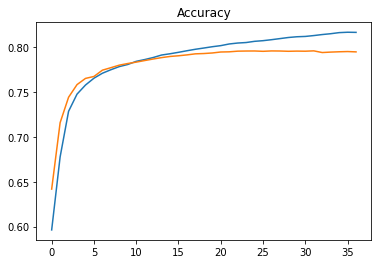

In [ ]:
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('Accuracy')

Text(0.5, 1.0, 'Loss')

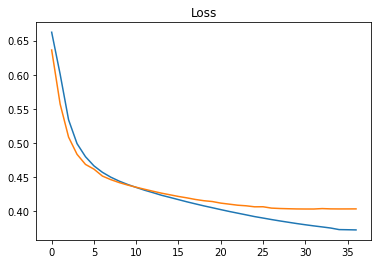

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Loss')

# Saving the Model and Weights

In [ ]:
model1.save('/content/drive/MyDrive/My Fun Word Classifier for Hare/final_model.h5')

# Evaluating the model on the validation set

In [ ]:
x = model1.evaluate([hashtags[split:], text[split:]], labels[split:])

2779/2779 [==============================] - 9s 3ms/step - loss: 0.4049 - acc: 0.7932


# Inferencing on the validation set

In [ ]:
predicted = model1.predict([hashtags[split:], text[split:]])


In [ ]:
predicted = np.where(predicted > .5, 1, 0)
predictedVsRegular = pd.DataFrame({'Predicted': predicted.reshape(predicted.shape[0],), 'Actual': labels[split:]})

print(predictedVsRegular.head())

   Predicted  Actual
0          1       1
1          1       1
2          0       1
3          1       1
4          0       0


# Saving the inferencing vs actual dataset Republican = 1 Democrat = 0

In [ ]:
np.save('/content/drive/MyDrive/My Fun Word Classifier for Hare/PredVActual', predicted)

array([1, 1, 1, ..., 0, 1, 0])

# **bold text** THE FOLLOWING IS NOT PART OF THE CODE IT WAS JUST ALL OF MY DIFFERENT ATTEMPTS WITH DIFFERENT MODELS AND I PRESERVED THE NOTES FOR DOCUMENTATION PURPOSES. 

Ok so I fixed the hashtags so they are no longer the wrong shape and no longer have the weird jumbled values. 

I have saved all of the data so that I can save ram in the preprocessing step. 



Model1:
Adam: .0001
Batch: 70
ReduceLR Patience: 3
EarlyStop Patience: 5
Embed Out: 100

Max Acc = 0.79
Early Overfitting, I may need to adjust the learning rate or decrease the batch size... Maybe increase the vector space of the embedding layer??

First gonna try a bigger embedding layer. 


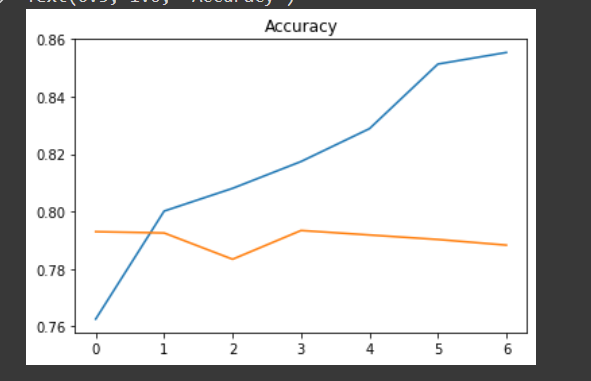

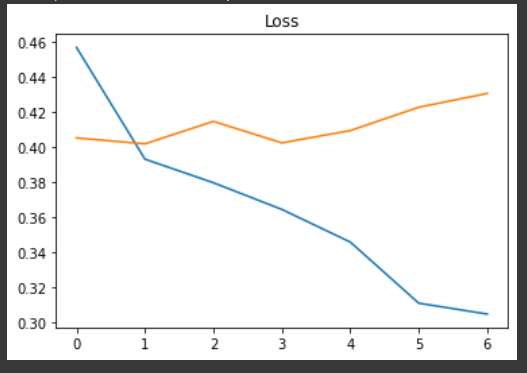

Model2:
Adam: .0001
Batch: 70
ReduceLR Patience: 3
EarlyStop Patience: 5
Embed Out: 150

Max Acc = 0.79
Best Loss = 0.4015
Early Overfitting. Adjusting the embedding layer had no effect.
I doubt that changing the learning rate or lowering the batch size will help much. I should try to add a dropout layer perhaps?




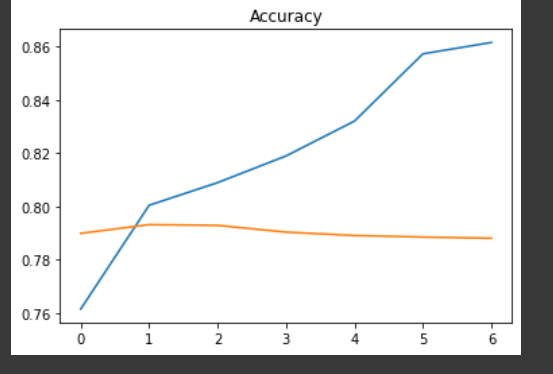

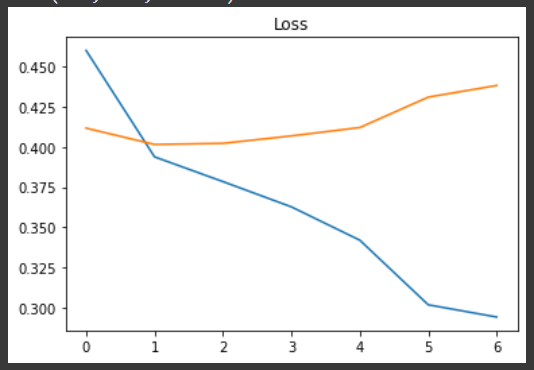

Model3:
Adam: .0001
Batch: 70
ReduceLR Patience: 3
EarlyStop Patience: 5
Embed Out: 100

Max Acc = 0.79
Early Overfitting... again, I used a dropout layer this time. To no effect. I may want to try a smaller batch size to simulate noise next attempt. 

Note: I may want to try either a 1D CNN on the text data, I may also want to try removing the text data and replacing it with a length scalar instead. 

Next I'm gonna try adding one more layer with dropout and see what that does. 

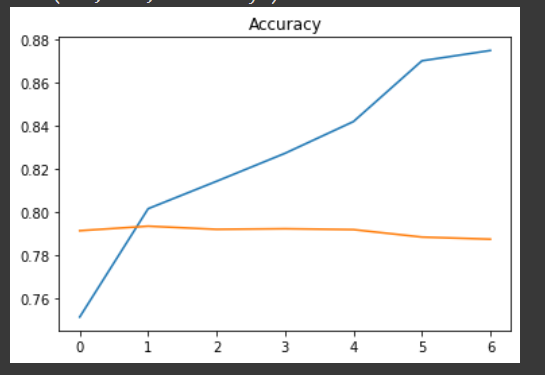

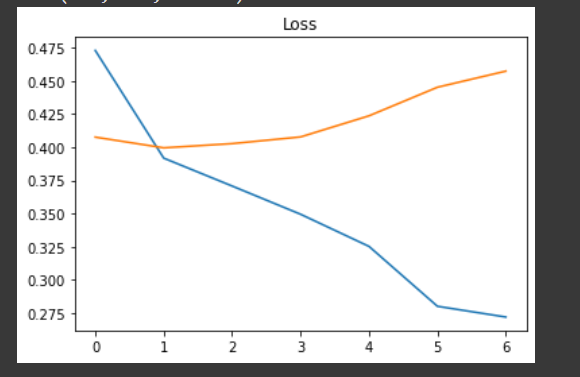

Model4: Adam: .0001 Batch: 70 ReduceLR Patience: 3 EarlyStop Patience: 5 Embed Out: 100

Max Acc = 0.79 Early Overfitting... added a 3rd dense layer, this was the wrong thing to do, nothing changed. 


Next I'm gonna remove one layer and change to sigmoid and normalize


MODEL: 
Model: "model_1"
________________________________________________________________________________
==================================================================================================
 input_10 (InputLayer)          [(None, 904)]        0           []                               
                                                                                                  
 embedding_3 (Embedding)        (None, 904, 150)     300000      ['input_10[0][0]']               
                                                                                                  
 flatten_2 (Flatten)            (None, 135600)       0           ['embedding_3[0][0]']            
                                                                                                  
 input_11 (InputLayer)          [(None, 501)]        0           []                               
                                                                                                  
 input_12 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_13 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 concatenate_2 (Concatenate)    (None, 136103)       0           ['flatten_2[0][0]',              
                                                                  'input_11[0][0]',               
                                                                  'input_12[0][0]',               
                                                                  'input_13[0][0]']               
                                                                                                  
 dense_8 (Dense)                (None, 300)          40831200    ['concatenate_2[0][0]']          
 dropout_4 (Dropout)            (None, 300)          0           ['dense_8[0][0]']                
 dense_9 (Dense)                (None, 150)          45150       ['dropout_4[0][0]']             
 dropout_5 (Dropout)            (None, 150)          0           ['dense_9[0][0]']                
 dense_10 (Dense)               (None, 50)           7550        ['dropout_5[0][0]']                         
 dense_11 (Dense)               (None, 1)            51          ['dense_10[0][0]']      

Model 5: Model: "model_2"
________________________________________________________________________________
==================================================================================================
 input_14 (InputLayer)          [(None, 904)]        0           []                               
                                                                                                  
 embedding_4 (Embedding)        (None, 904, 150)     300000      ['input_14[0][0]']               
                                                                                                  
 flatten_3 (Flatten)            (None, 135600)       0           ['embedding_4[0][0]']            
                                                                                                  
 input_15 (InputLayer)          [(None, 501)]        0           []                               
                                                                                                  
 input_16 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_17 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 concatenate_3 (Concatenate)    (None, 136103)       0           ['flatten_3[0][0]',              
                                                                  'input_15[0][0]',               
                                                                  'input_16[0][0]',               
                                                                  'input_17[0][0]']               
                                                                                                  
 dense_12 (Dense)               (None, 300)          40831200    ['concatenate_3[0][0]']          
                                                                                                  
 normalization (Normalization)  (None, 300)          601         ['dense_12[0][0]']               
                                                                                                  
 dense_13 (Dense)               (None, 50)           15050       ['normalization[0][0]']          
                                                                                                  
 dropout_6 (Dropout)            (None, 50)           0           ['dense_13[0][0]']               
                                                                                                  
 dense_14 (Dense)               (None, 1)            51          ['dropout_6[0][0]']              



Model2: Adam: .0001 Batch: 70 ReduceLR Patience: 3 EarlyStop Patience: 5 Embed Out: 150

Max Acc = 0.79 Early Overfitting. Changing to a smaller model, maybe that will help
                                                                                       

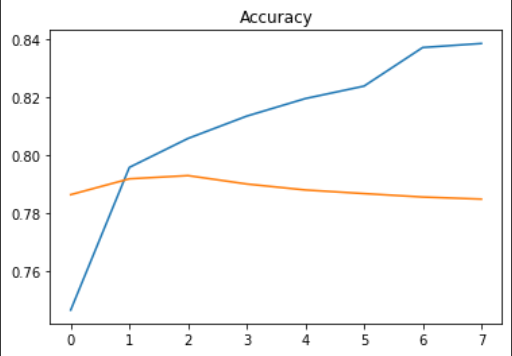

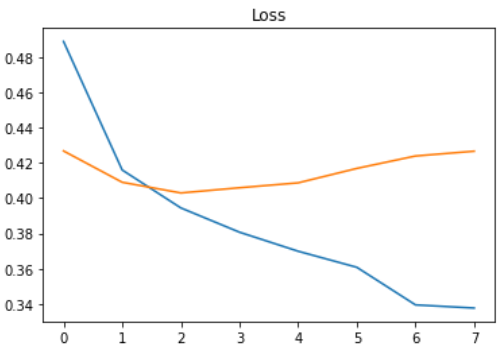

input_6 (InputLayer)           [(None, 501)]        0           []                               
                                                                                                  
 input_7 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 concatenate_1 (Concatenate)    (None, 503)          0           ['input_6[0][0]',                
                                                                  'input_7[0][0]',                
                                                                  'input_8[0][0]']                
                                                                                                  
 dense_2 (Dense)                (None, 50)           25200       ['concatenate_1[0][0]']          
                                                                                                  
 dropout_1 (Dropout)            (None, 50)           0           ['dense_2[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 1)            51          ['dropout_1[0][0]']     





 Model4: Adam: .0001 Batch: 70 ReduceLR Patience: 3 EarlyStop Patience: 5 Embed Out: 100

Max Acc = 0.72    
I removed the text from this model, but the accuracy went down
I'm gonna put the text back and try a CNN, maybe there is some structure?  We'll see

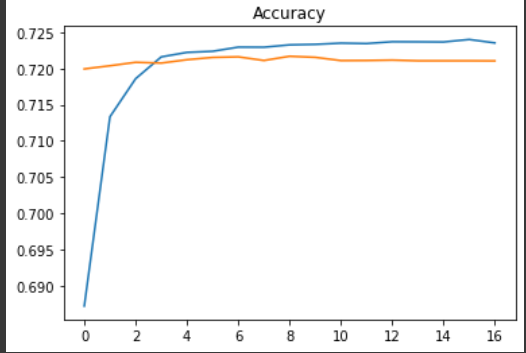

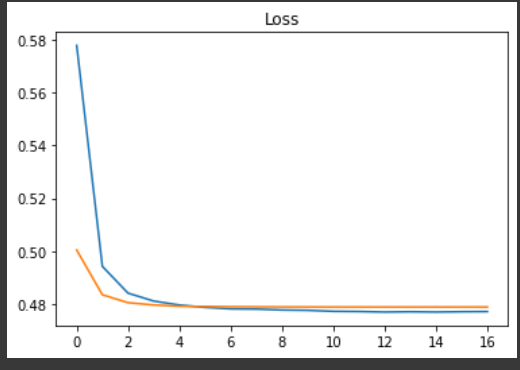

 input_10 (InputLayer)          [(None, 904)]        0           []                               
                                                                                                  
 embedding_3 (Embedding)        (None, 904, 150)     300000      ['input_10[0][0]']               
                                                                                                  
 conv1d_2 (Conv1D)              (None, 902, 256)     115456      ['embedding_3[0][0]']            
                                                                                                  
 max_pooling1d_1 (MaxPooling1D)  (None, 451, 256)    0           ['conv1d_2[0][0]']               
                                                                                                  
 dropout_3 (Dropout)            (None, 451, 256)     0           ['max_pooling1d_1[0][0]']        
                                                                                                  
 conv1d_3 (Conv1D)              (None, 449, 256)     196864      ['dropout_3[0][0]']              
                                                                                                  
 max_pooling1d_2 (MaxPooling1D)  (None, 224, 256)    0           ['conv1d_3[0][0]']               
                                                                                                  
 dropout_4 (Dropout)            (None, 224, 256)     0           ['max_pooling1d_2[0][0]']        
                                                                                                  
 flatten_2 (Flatten)            (None, 57344)        0           ['dropout_4[0][0]']              
                                                                                                  
 input_11 (InputLayer)          [(None, 501)]        0           []                               
                                                                                                  
 input_12 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_13 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 concatenate_2 (Concatenate)    (None, 57847)        0           ['flatten_2[0][0]',              
                                                                  'input_11[0][0]',               
                                                                  'input_12[0][0]',               
                                                                  'input_13[0][0]']               
                                                                                                  
 dense_4 (Dense)                (None, 50)           2892400     ['concatenate_2[0][0]']          
                                                                                                  
 dropout_5 (Dropout)            (None, 50)           0           ['dense_4[0][0]']                
                                                                                                  
 dense_5 (Dense)                (None, 1)            51          ['dropout_5[0][0]']   


 Max Acc = 0.79

CNN on text barely did anything
I'm gonna put the text back and try a CNN, maybe there is some structure?  We'll see

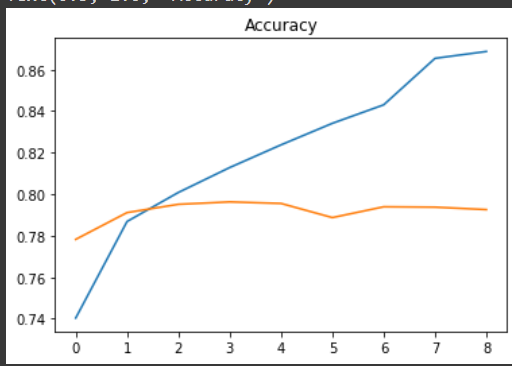

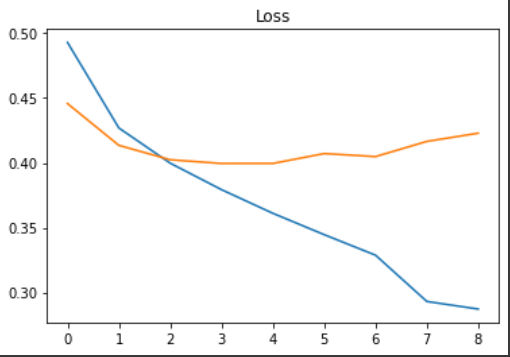

This Model was a start from scatch, no cnn, added year, mentions, and text_length. One hidden layer 150, model didn't get past baseline random. Going to add a layer and see what happens. 

Upped it to 300, didnt' pass 54% Underfitting

Added another dense layer of 150: Still Underfitting, rather doing nothing, gonna try one more layer and if that doesn't work I'll remove a piece of data

Added another dense layer of 75, did nothing, either I scrambled my data or the new data that I added is confusing the thing. 

Ok removed all of the new data and tried with year only added, it wouldn't train at all. 

Removed all data and trained with just 

OK HERE IS WHERE TO START: 
Single Hidden Dense Layer of 300 size max accuracy of 79% best loss .4058  

Next add in mentions and see what happens. 



Model includes hashtags text_len and text, with Dense 300 D.2 300, and got 75% acc .46 loss

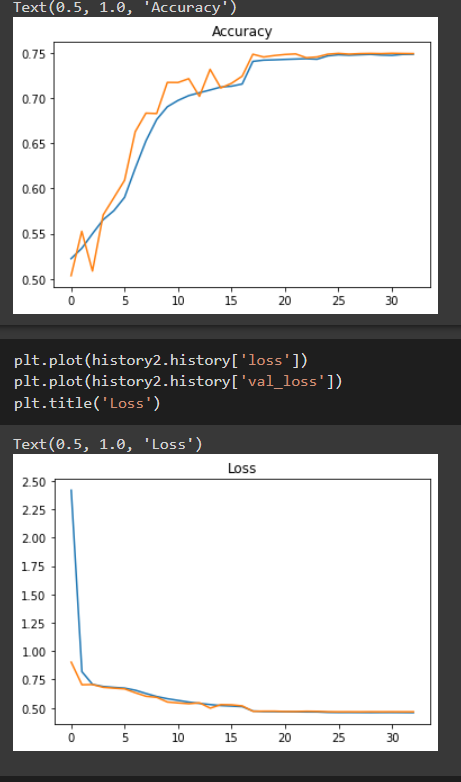

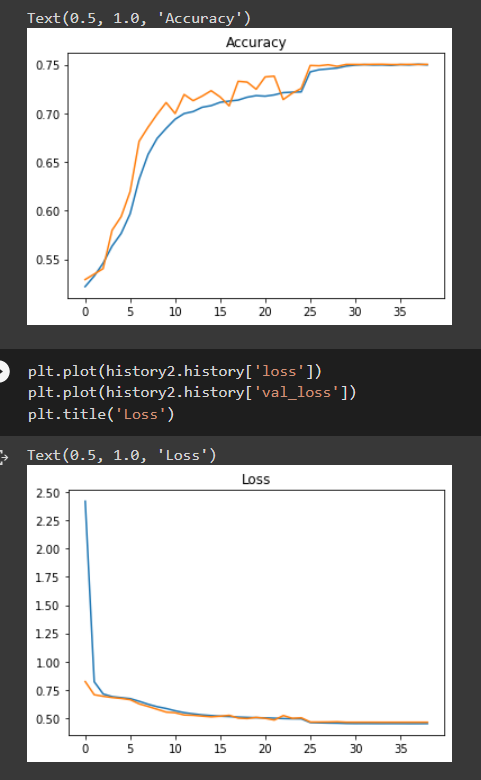


Same as prveious model just removed mentions so that isn't a good datapoint

image.png

New model 300 drop .2 300 drop .2 150

val accuracy 75% loss .4554

ok trying with original feature next

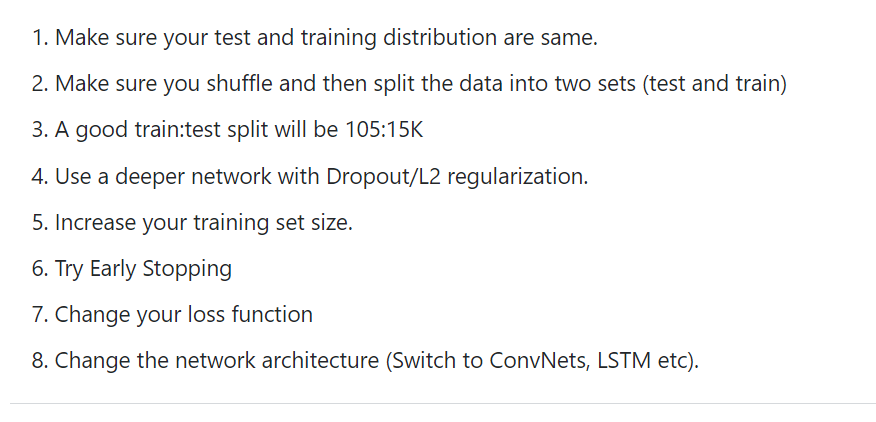

In [ ]:
# Training a new netowork with LSTM for text
